In [4]:
import theano
theano.__version__

'1.0.5'

In [5]:
from theano import tensor
# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()

# create a simple symbolic expression
c=a+b
# convert the expression into a callable object that takes (a,b) and computes c
f = theano.function([a,b], c)
# bind 1.5 to a , 2.5 to b , and evaluate c
result = f(1.5, 2.5)
print(result)

4.0


Trying to git from VS code.

In [5]:
# Example of TensorFlow library
# importing packages
import tensorflow as tf

# declare two symbolic floating-point scalars
a = tf.compat.v1.placeholder(tf.float32)
b = tf.compat.v1.placeholder(tf.float32)
# create a simple symbolic expression using the add function
add = tf.add(a, b)
# bind 1.5 to a , 2.5 to b , and evaluate c
sess = tf.compat.v1.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)

4.0


In [6]:
import networkx as nx
G= nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])

In [7]:
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) 
G.add_edges_from([(1, 2), (1, 3)])

In [3]:
import networkx as nx
import numpy as np
from sklearn.manifold import SpectralEmbedding

# Create a simple graph with 4 nodes and 3 edges
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4,1)])

# Create the adjacency matrix of the graph
A = nx.adjacency_matrix(G).toarray()

# Perform spectral embedding on the graph
se = SpectralEmbedding(n_components=2)
X = se.fit_transform(A)

# Print the node coordinates in the embedded space
print(X)

[[ 0.80037323  0.7580199 ]
 [-0.59950204 -0.65223142]
 [ 0.80037323 -0.7580199 ]
 [-0.59950204  0.65223142]]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [26]:
import networkx as nx

# Create my graph
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 2), (1, 3, 5), (2, 3, 1), (3, 4,2), (1, 4,3), (4,5,7), (5,6,1), (6,7,3), (7,5,2)])

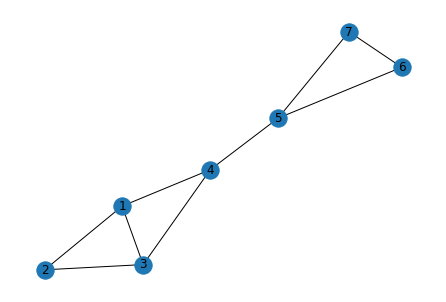

In [27]:
nx.draw(G, with_labels=True) 

# Display the graph
import matplotlib.pyplot as plt
plt.show()

In [28]:
edge_weights = {(1, 2): 2, (2, 3): 1, (1, 3): 5, (3,4): 2, (1, 4): 3, (4, 5): 7, (5, 7): 2, (7,6):2, (6,5):1}
nx.set_edge_attributes(G, edge_weights, 'weight')

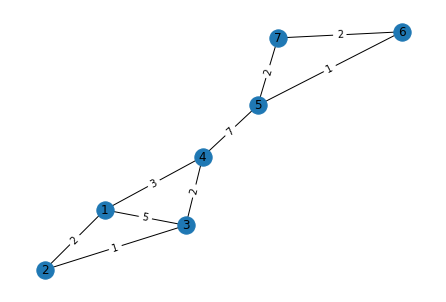

In [30]:
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [31]:
edge_list = [[edge[0], edge[1], weight] for edge, weight in edge_weights.items()]

print(edge_list)

[[1, 2, 2], [2, 3, 1], [1, 3, 5], [3, 4, 2], [1, 4, 3], [4, 5, 7], [5, 7, 2], [7, 6, 2], [6, 5, 1]]


In [32]:
import numpy as np
edge_list_matrix = np.matrix(edge_list) 

In [33]:
edge_list_matrix

matrix([[1, 2, 2],
        [2, 3, 1],
        [1, 3, 5],
        [3, 4, 2],
        [1, 4, 3],
        [4, 5, 7],
        [5, 7, 2],
        [7, 6, 2],
        [6, 5, 1]])

In [43]:
adj_matrix = nx.to_numpy_matrix(G)

# Print the adjacency matrix
print(adj_matrix)

[[0. 2. 5. 3. 0. 0. 0.]
 [2. 0. 1. 0. 0. 0. 0.]
 [5. 1. 0. 2. 0. 0. 0.]
 [3. 0. 2. 0. 7. 0. 0.]
 [0. 0. 0. 7. 0. 1. 2.]
 [0. 0. 0. 0. 1. 0. 2.]
 [0. 0. 0. 0. 2. 2. 0.]]


In [44]:
adj_matrix1=adj_matrix
for i in range(adj_matrix1.shape[0]):
    for j in range(adj_matrix1.shape[1]):
        # Check if the element is not equal to zero
        if adj_matrix1[i, j] != 0:
            # Set the element to 1
            adj_matrix1[i, j] = 1

# Print the modified matrix
print(adj_matrix1)

[[0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0.]]


In [53]:
labels= np.matrix([[.25,.25,.25,.25,0,0,0],[0,0,0,0,.33,.33,.33]])
labels

matrix([[0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.33, 0.33, 0.33]])

In [61]:
z= adj_matrix1*np.transpose(labels)
print(z)


[[0.75 0.  ]
 [0.5  0.  ]
 [0.75 0.  ]
 [0.5  0.33]
 [0.25 0.66]
 [0.   0.66]
 [0.   0.66]]


In [56]:
# Get the degree of each node
degrees = dict(G.degree())

# Create an empty square matrix with the same number of rows and columns as the number of nodes
diag_matrix = np.zeros((len(degrees), len(degrees)))

# Fill the diagonal of the matrix with the degree of each node
for i, degree in degrees.items():
    diag_matrix[i-1, i-1] = degree

print(diag_matrix)

[[3. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]
